In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy import stats

In [19]:
df = pd.read_csv('AA_All_resultados.csv')  # To find the Galaxy data

In [20]:
# Distribuciones para las supernovas Ia

SNIa_DTD2 = np.zeros(42)
SNIa_DTD15 = np.zeros(42)
SNIa_DTD1 = np.zeros(42)
SNIa_DTD75 = np.zeros(42)
SNIa_DTD50 = np.zeros(42)
SNIa_Ha = np.zeros(42)
SNIa_SFR = np.zeros(42)
k = 0
for i in np.arange(len(df['SN'])):
    if df.at[i,'SN']==1:
        SNIa_DTD2[k] = float(df.at[i,'DTD 2'].replace(',','.'))
        SNIa_DTD15[k] = float(df.at[i,'DTD 1.5'].replace(',','.'))
        SNIa_DTD1[k] = float(df.at[i,'DTD 1'].replace(',','.'))
        SNIa_DTD75[k] = float(df.at[i,'DTD 0.75'].replace(',','.'))
        SNIa_DTD50[k] = float(df.at[i,'DTD 0.5'].replace(',','.'))
        SNIa_Ha[k] = float(df.at[i,'Ha'].replace(',','.'))
        SNIa_SFR[k] = float(df.at[i,'SFR'].replace(',','.'))
        k = k + 1

SNIa_DTD2 = np.sort(SNIa_DTD2)
SNIa_DTD15 = np.sort(SNIa_DTD15)
SNIa_DTD1 = np.sort(SNIa_DTD1)
SNIa_DTD75 = np.sort(SNIa_DTD75)
SNIa_DTD50 = np.sort(SNIa_DTD50)
SNIa_Ha = np.sort(SNIa_Ha)
SNIa_SFR = np.sort(SNIa_SFR)

N_Ia = np.arange(len(SNIa_Ha))
N_Ia = N_Ia + 0.5
N_Ia = np.double(N_Ia)/(len(N_Ia))

In [21]:
# Test Kolmogorov Smirnov

SNIa_DTD2_err  = ks_2samp(SNIa_DTD2,  N_Ia)[1]
SNIa_DTD15_err = ks_2samp(SNIa_DTD15, N_Ia)[1]
SNIa_DTD1_err  = ks_2samp(SNIa_DTD1,  N_Ia)[1]
SNIa_DTD75_err = ks_2samp(SNIa_DTD75, N_Ia)[1]
SNIa_DTD50_err = ks_2samp(SNIa_DTD50, N_Ia)[1]
SNIa_Ha_err    = ks_2samp(SNIa_Ha,    N_Ia)[1]
SNIa_SFR_err   = ks_2samp(SNIa_SFR,   N_Ia)[1]

SNIa_DTD2_err = np.around(SNIa_DTD2_err*100,2)
SNIa_DTD15_err = np.around(SNIa_DTD15_err*100,2)
SNIa_DTD1_err = np.around(SNIa_DTD1_err*100,2)
SNIa_DTD75_err = np.around(SNIa_DTD75_err*100,2)
SNIa_DTD50_err = np.around(SNIa_DTD50_err*100,2)
SNIa_Ha_err = np.around(SNIa_Ha_err*100,2)
SNIa_SFR_err = np.around(SNIa_SFR_err*100,2)

In [22]:
# Test de Anderson Darling

SNIa_DTD2_And_err  = anderson_ksamp([SNIa_DTD2,  N_Ia])[2]
SNIa_DTD15_And_err = anderson_ksamp([SNIa_DTD15, N_Ia])[2]
SNIa_DTD1_And_err  = anderson_ksamp([SNIa_DTD1,  N_Ia])[2]
SNIa_DTD75_And_err = anderson_ksamp([SNIa_DTD75, N_Ia])[2]
SNIa_DTD50_And_err = anderson_ksamp([SNIa_DTD50, N_Ia])[2]
SNIa_Ha_And_err    = anderson_ksamp([SNIa_Ha,    N_Ia])[2]
SNIa_SFR_And_err   = anderson_ksamp([SNIa_SFR,   N_Ia])[2]

SNIa_DTD2_And_err  = np.absolute(np.around(SNIa_DTD2_And_err *100,2))
SNIa_DTD15_And_err = np.absolute(np.around(SNIa_DTD15_And_err*100,2))
SNIa_DTD1_And_err  = np.absolute(np.around(SNIa_DTD1_And_err *100,2))
SNIa_DTD75_And_err = np.absolute(np.around(SNIa_DTD75_And_err*100,2))
SNIa_DTD50_And_err = np.absolute(np.around(SNIa_DTD50_And_err*100,2))
SNIa_Ha_And_err    = np.absolute(np.around(SNIa_Ha_And_err   *100,2))
SNIa_SFR_And_err   = np.absolute(np.around(SNIa_SFR_And_err  *100,2))

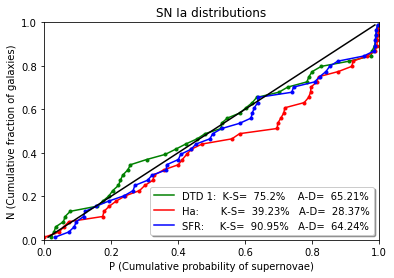

In [23]:
# Plot supernovas Ia

plt.plot(SNIa_DTD1,N_Ia,'g-',label='DTD 1:  K-S=  {}%    A-D=  {}%'.format(SNIa_DTD1_err,SNIa_DTD1_And_err))
plt.plot(SNIa_DTD1,N_Ia,'g.')

plt.plot(SNIa_Ha,N_Ia,'r-',label='Ha:       K-S=  {}%   A-D=  {}%'.format(SNIa_Ha_err,SNIa_Ha_And_err))
plt.plot(SNIa_Ha,N_Ia,'r.')

plt.plot(SNIa_SFR,N_Ia,'b-',label='SFR:     K-S=  {}%   A-D=  {}%'.format(SNIa_SFR_err,SNIa_SFR_And_err))
plt.plot(SNIa_SFR,N_Ia,'b.')


plt.plot(N_Ia,N_Ia,'k')

plt.title('SN Ia distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')
plt.legend(bbox_to_anchor=(0.18, 0.0, 0.82, 1),shadow=True)

plt.savefig('SN_Ia.png')

plt.show()
plt.close()

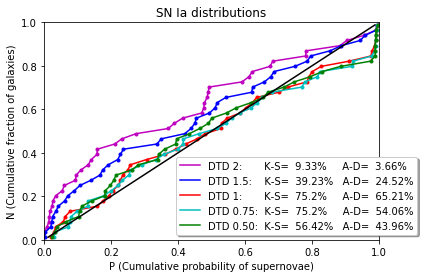

In [24]:
# Plot sensibilidad del exponente del DTD

plt.plot(SNIa_DTD2,N_Ia,'m-',label='DTD 2:       K-S=  {}%     A-D=  {}%'.format(SNIa_DTD2_err,SNIa_DTD2_And_err))
plt.plot(SNIa_DTD2,N_Ia,'m.')

plt.plot(SNIa_DTD15,N_Ia,'b-',label='DTD 1.5:    K-S=  {}%   A-D=  {}%'.format(SNIa_DTD15_err,SNIa_DTD15_And_err))
plt.plot(SNIa_DTD15,N_Ia,'b.')

plt.plot(SNIa_DTD1,N_Ia,'r-',label='DTD 1:       K-S=  {}%     A-D=  {}%'.format(SNIa_DTD1_err,SNIa_DTD1_And_err))
plt.plot(SNIa_DTD1,N_Ia,'r.')

plt.plot(SNIa_DTD75,N_Ia,'c-',label='DTD 0.75:  K-S=  {}%     A-D=  {}%'.format(SNIa_DTD75_err,SNIa_DTD75_And_err))
plt.plot(SNIa_DTD75,N_Ia,'c.')

plt.plot(SNIa_DTD50,N_Ia,'g-',label='DTD 0.50:  K-S=  {}%   A-D=  {}%'.format(SNIa_DTD50_err,SNIa_DTD50_And_err))
plt.plot(SNIa_DTD50,N_Ia,'g.')

plt.plot(N_Ia,N_Ia,'k')

plt.title('SN Ia distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')
plt.legend(bbox_to_anchor=(0.18, 0.0, 0.95, 1),shadow=True)

plt.savefig('SN_Ia_DTD_sensibility.png')

plt.show()
plt.close()

In [25]:
# Distribuciones para las supernovas CC

SNCC_DTD2 = np.zeros(13)
SNCC_DTD15 = np.zeros(13)
SNCC_DTD1 = np.zeros(13)
SNCC_DTD75 = np.zeros(13)
SNCC_DTD50 = np.zeros(13)
SNCC_Ha = np.zeros(13)
SNCC_SFR = np.zeros(13)
k = 0
for i in np.arange(len(df['SN'])):
    if df.at[i,'SN']==2:
        SNCC_DTD2[k] = float(df.at[i,'DTD 2'].replace(',','.'))
        SNCC_DTD15[k] = float(df.at[i,'DTD 1.5'].replace(',','.'))
        SNCC_DTD1[k] = float(df.at[i,'DTD 1'].replace(',','.'))
        SNCC_DTD75[k] = float(df.at[i,'DTD 0.75'].replace(',','.'))
        SNCC_DTD50[k] = float(df.at[i,'DTD 0.5'].replace(',','.'))
        SNCC_Ha[k] = float(df.at[i,'Ha'].replace(',','.'))
        SNCC_SFR[k] = float(df.at[i,'SFR'].replace(',','.'))
        k = k + 1

SNCC_DTD2 = np.sort(SNCC_DTD2)
SNCC_DTD15 = np.sort(SNCC_DTD15)
SNCC_DTD1 = np.sort(SNCC_DTD1)
SNCC_DTD75 = np.sort(SNCC_DTD75)
SNCC_DTD50 = np.sort(SNCC_DTD50)
SNCC_Ha = np.sort(SNCC_Ha)
SNCC_SFR = np.sort(SNCC_SFR)

N_CC = np.arange(len(SNCC_Ha))
N_CC = N_CC + 0.5
N_CC = np.double(N_CC)/(len(N_CC))

In [26]:
# Test de Kolmogorov Smirnov

SNCC_DTD2_err  = ks_2samp(SNCC_DTD2,  N_CC)[1]
SNCC_DTD15_err = ks_2samp(SNCC_DTD15, N_CC)[1]
SNCC_DTD1_err  = ks_2samp(SNCC_DTD1,  N_CC)[1]
SNCC_DTD75_err = ks_2samp(SNCC_DTD75, N_CC)[1]
SNCC_DTD50_err = ks_2samp(SNCC_DTD50, N_CC)[1]
SNCC_Ha_err    = ks_2samp(SNCC_Ha,    N_CC)[1]
SNCC_SFR_err   = ks_2samp(SNCC_SFR,   N_CC)[1]

SNCC_DTD2_err = np.around(SNCC_DTD2_err*100,2)
SNCC_DTD15_err = np.around(SNCC_DTD15_err*100,2)
SNCC_DTD1_err = np.around(SNCC_DTD1_err*100,2)
SNCC_DTD75_err = np.around(SNCC_DTD75_err*100,2)
SNCC_DTD50_err = np.around(SNCC_DTD50_err*100,2)
SNCC_Ha_err = np.around(SNCC_Ha_err*100,2)
SNCC_SFR_err = np.around(SNCC_SFR_err*100,2)

In [27]:
# Test de Anderson Darling

SNCC_DTD2_And_err  = anderson_ksamp([SNCC_DTD2,  N_CC])[2]
SNCC_DTD15_And_err = anderson_ksamp([SNCC_DTD15, N_CC])[2]
SNCC_DTD1_And_err  = anderson_ksamp([SNCC_DTD1,  N_CC])[2]
SNCC_DTD75_And_err = anderson_ksamp([SNCC_DTD75, N_CC])[2]
SNCC_DTD50_And_err = anderson_ksamp([SNCC_DTD50, N_CC])[2]
SNCC_Ha_And_err    = anderson_ksamp([SNCC_Ha,    N_CC])[2]
SNCC_SFR_And_err   = anderson_ksamp([SNCC_SFR,   N_CC])[2]

SNCC_DTD2_And_err  = np.absolute(np.around(SNCC_DTD2_And_err *100,2))
SNCC_DTD15_And_err = np.absolute(np.around(SNCC_DTD15_And_err*100,2))
SNCC_DTD1_And_err  = np.absolute(np.around(SNCC_DTD1_And_err *100,2))
SNCC_DTD75_And_err = np.absolute(np.around(SNCC_DTD75_And_err*100,2))
SNCC_DTD50_And_err = np.absolute(np.around(SNCC_DTD50_And_err*100,2))
SNCC_Ha_And_err    = np.absolute(np.around(SNCC_Ha_And_err   *100,2))
SNCC_SFR_And_err   = np.absolute(np.around(SNCC_SFR_And_err  *100,2))

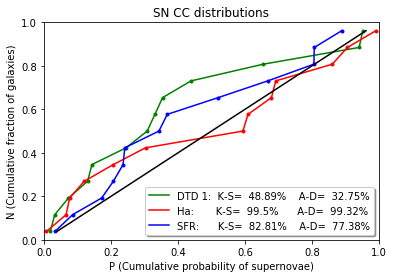

In [28]:
# Plot supernovas CC

plt.plot(SNCC_DTD1,N_CC,'g-',label='DTD 1:  K-S=  {}%    A-D=  {}%'.format(SNCC_DTD1_err,SNCC_DTD1_And_err))
plt.plot(SNCC_DTD1,N_CC,'g.')

plt.plot(SNCC_Ha,N_CC,'r-',label='Ha:       K-S=  {}%      A-D=  {}%'.format(SNCC_Ha_err,SNCC_Ha_And_err))
plt.plot(SNCC_Ha,N_CC,'r.')

plt.plot(SNCC_SFR,N_CC,'b-',label='SFR:      K-S=  {}%    A-D=  {}%'.format(SNCC_SFR_err,SNCC_SFR_And_err))
plt.plot(SNCC_SFR,N_CC,'b.')


plt.plot(N_CC,N_CC,'k')

plt.title('SN CC distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')
plt.legend(bbox_to_anchor=(0.18, 0.0, 0.82, 1),shadow=True)

plt.savefig('SN_CC.png')

plt.show()
plt.close()

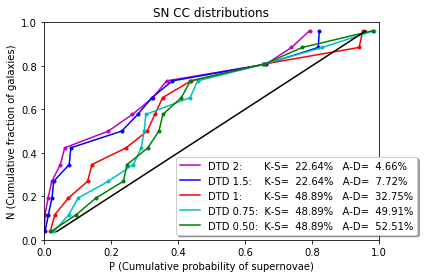

In [29]:
# Plot sensibilidad del exponente del DTD

plt.plot(SNCC_DTD2,N_CC,'m-',label='DTD 2:       K-S=  {}%   A-D=  {}%'.format(SNCC_DTD2_err,SNCC_DTD2_And_err))
plt.plot(SNCC_DTD2,N_CC,'m.')

plt.plot(SNCC_DTD15,N_CC,'b-',label='DTD 1.5:    K-S=  {}%   A-D=  {}%'.format(SNCC_DTD15_err,SNCC_DTD15_And_err))
plt.plot(SNCC_DTD15,N_CC,'b.')

plt.plot(SNCC_DTD1,N_CC,'r-',label='DTD 1:       K-S=  {}%   A-D=  {}%'.format(SNCC_DTD1_err,SNCC_DTD1_And_err))
plt.plot(SNCC_DTD1,N_CC,'r.')

plt.plot(SNCC_DTD75,N_CC,'c-',label='DTD 0.75:  K-S=  {}%   A-D=  {}%'.format(SNCC_DTD75_err,SNCC_DTD75_And_err))
plt.plot(SNCC_DTD75,N_CC,'c.')

plt.plot(SNCC_DTD50,N_CC,'g-',label='DTD 0.50:  K-S=  {}%   A-D=  {}%'.format(SNCC_DTD50_err,SNCC_DTD50_And_err))
plt.plot(SNCC_DTD50,N_CC,'g.')

plt.plot(N_CC,N_CC,'k')

plt.title('SN CC distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')
plt.legend(bbox_to_anchor=(0.18, 0.0, 0.95, 1),shadow=True)

plt.savefig('SN_CC_DTD_sensibility.png')

plt.show()
plt.close()